<a href="https://colab.research.google.com/github/Animesh-roy100/Semantic-Analysis-Satellite-Imagery/blob/main/Semantic_Segmentation_of_Satellite_Imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset'

total 33K
-rw------- 1 root root  548 May 29  2020  classes.json
drwx------ 4 root root 4.0K Dec  6 15:11 'Tile 1'
drwx------ 4 root root 4.0K Dec  6 15:11 'Tile 2'
drwx------ 4 root root 4.0K Dec  6 15:11 'Tile 3'
drwx------ 4 root root 4.0K Dec  6 15:11 'Tile 4'
drwx------ 4 root root 4.0K Dec  6 15:11 'Tile 5'
drwx------ 4 root root 4.0K Dec  6 15:11 'Tile 6'
drwx------ 4 root root 4.0K Dec  6 15:11 'Tile 7'
drwx------ 4 root root 4.0K Dec  6 15:11 'Tile 8'


In [153]:
image_patch_size = 256

In [154]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/dataset'

In [155]:
dataset_name = "Semantic segmentation dataset"

In [156]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
import os
import cv2
from PIL import Image
import numpy as np 
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

from tensorflow.keras.utils import to_categorical

In [158]:
minmaxscaler = MinMaxScaler()

In [159]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 6/masks
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 2/masks
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 4/masks
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 7/masks
/content/drive/MyDrive/Colab Notebooks/dataset/Semantic segmentation dataset/Tile 5/masks


In [160]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg', 1)

In [161]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [162]:
image_patches

array([[[[[[201, 195, 190],
           [225, 219, 214],
           [241, 232, 228],
           ...,
           [228, 219, 210],
           [219, 212, 203],
           [224, 217, 208]],

          [[226, 220, 215],
           [254, 248, 243],
           [255, 255, 251],
           ...,
           [238, 229, 220],
           [237, 230, 221],
           [243, 234, 225]],

          [[248, 241, 238],
           [255, 252, 249],
           [255, 255, 251],
           ...,
           [238, 228, 221],
           [235, 228, 219],
           [230, 221, 212]],

          ...,

          [[225, 220, 221],
           [209, 205, 204],
           [188, 187, 183],
           ...,
           [185, 174, 184],
           [218, 210, 221],
           [173, 168, 177]],

          [[196, 192, 191],
           [202, 198, 197],
           [221, 220, 216],
           ...,
           [137, 127, 139],
           [170, 163, 176],
           [171, 166, 175]],

          [[193, 188, 185],
           [201, 198, 194]

In [163]:
len(image_patches)

2

In [164]:
print(image_patches.shape)

(2, 3, 1, 256, 256, 3)


In [165]:
image_x = image_patches[0,0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [166]:
image_y.shape

(1, 256, 256, 3)

In [167]:
image_y[0].shape

(256, 256, 3)

In [168]:
print(type(image))

<class 'numpy.ndarray'>


In [169]:
type(Image.fromarray(image))

PIL.Image.Image

In [170]:
print(image)

[[[201 195 190]
  [225 219 214]
  [241 232 228]
  ...
  [255 236 231]
  [254 234 229]
  [255 239 234]]

 [[226 220 215]
  [254 248 243]
  [255 255 251]
  ...
  [252 231 229]
  [247 228 223]
  [242 223 218]]

 [[248 241 238]
  [255 252 249]
  [255 255 251]
  ...
  [253 234 231]
  [252 235 232]
  [245 228 225]]

 ...

 [[211 200 203]
  [220 209 212]
  [221 211 217]
  ...
  [220 229 242]
  [234 243 255]
  [235 244 255]]

 [[209 198 201]
  [219 208 211]
  [220 210 216]
  ...
  [213 222 235]
  [222 231 244]
  [218 227 240]]

 [[213 202 205]
  [210 199 202]
  [201 191 197]
  ...
  [223 232 245]
  [233 242 255]
  [230 239 252]]]


In [171]:
image.shape

(644, 797, 3)

In [172]:
(image.shape[1]//image_patch_size)*image_patch_size

768

# Reading and Processing Satellite Images

This method will read all the images and then crop and patchify them

In [173]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)

In [174]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


# Rendering Source and Mask Images

Reading the processed image and mask dataset and check content

In [175]:
image_dataset[0] 
# Decimal values inside the image Array

array([[[0.78823529, 0.76470588, 0.74509804],
        [0.88235294, 0.85882353, 0.83921569],
        [0.94509804, 0.90980392, 0.89411765],
        ...,
        [0.89411765, 0.85882353, 0.82352941],
        [0.85882353, 0.83137255, 0.79607843],
        [0.87843137, 0.85098039, 0.81568627]],

       [[0.88627451, 0.8627451 , 0.84313725],
        [0.99607843, 0.97254902, 0.95294118],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89803922, 0.8627451 ],
        [0.92941176, 0.90196078, 0.86666667],
        [0.95294118, 0.91764706, 0.88235294]],

       [[0.97254902, 0.94509804, 0.93333333],
        [1.        , 0.98823529, 0.97647059],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89411765, 0.86666667],
        [0.92156863, 0.89411765, 0.85882353],
        [0.90196078, 0.86666667, 0.83137255]],

       ...,

       [[0.88235294, 0.8627451 , 0.86666667],
        [0.81960784, 0.80392157, 0.8       ],
        [0.7372549 , 0

In [176]:
mask_dataset[0]

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]

In [177]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [178]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [179]:
type(image_dataset[0])

numpy.ndarray

In [180]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

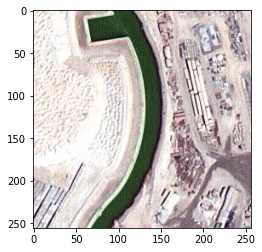

In [181]:
plt.imshow(image_dataset[0])

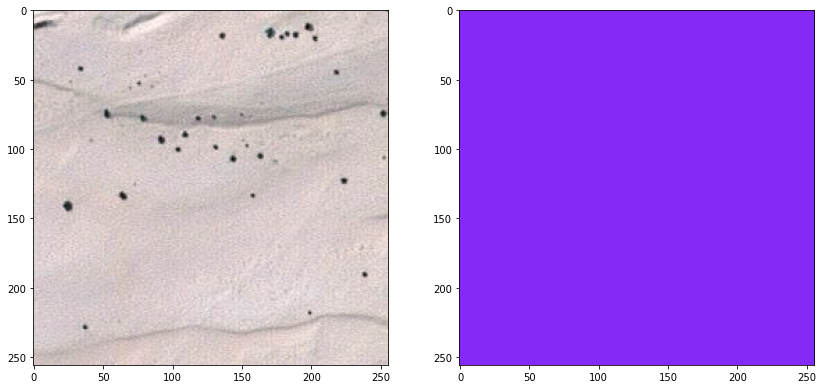

In [182]:
# Select random image and mask image
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

# Processing Mask Image Labels

Applying One-Hot Encoding with Labels Hex image type to Set RGB/Label

In [183]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [184]:
mask_dataset.shape

(945, 256, 256, 3)

In [185]:
mask_dataset.shape[0]

945

In [186]:
label = individual_patched_mask

In [187]:
# Creating labels
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [188]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [189]:
print(len(labels))

945


In [190]:
labels = np.array(labels)

In [191]:
labels[2]

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]], dtype=uint8)

In [192]:
labels = np.expand_dims(labels, axis=3)

In [193]:
labels[2]

array([[[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [194]:
np.unique(labels)
# Total unique labels

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [195]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


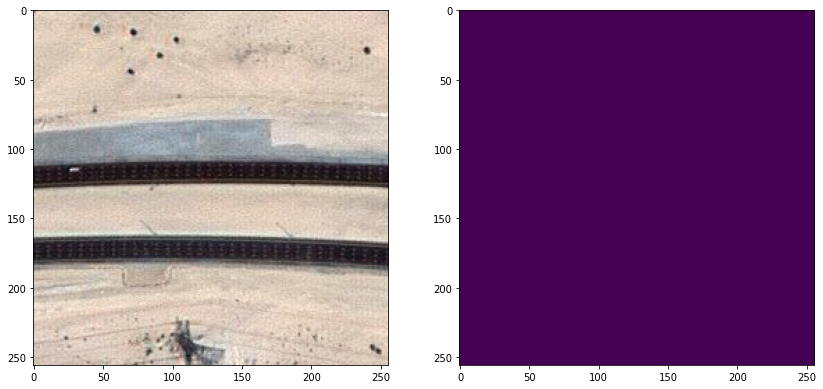

In [196]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])
# Now we are using labels

In [197]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

# Creating Training and Test Splits

Using the final image Dataset, generating training and test datasets

In [198]:
total_classes = len(np.unique(labels))

In [199]:
total_classes

6

In [200]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [201]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [202]:
master_trianing_dataset.shape

(945, 256, 256, 3)

In [203]:
master_trianing_dataset = image_dataset

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [206]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [207]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [208]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6
